<a href="https://colab.research.google.com/github/DevpriyaSaini/ML-100/blob/main/Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.compose import ColumnTransformer

In [11]:
df=pd.read_csv("/content/train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(714, 3)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Survived",axis=1),df["Survived"],test_size=0.2,random_state=42)

In [15]:
clf=DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_pred=clf.predict(x_test)

In [18]:
print(accuracy_score(y_test,y_pred))

0.6363636363636364


In [19]:
np.mean(cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5,scoring="accuracy"))

np.float64(0.6374828375286041)

In [20]:
!pip install -U scikit-learn

In [1]:
!pip uninstall -y scikit-learn
!pip uninstall -y sklearn
!pip install -U scikit-learn


Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)


In [4]:
from sklearn.preprocessing import KBinsDiscretizer

In [35]:
kbin_age=KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")
kbin_fare=KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")

In [36]:

trf=ColumnTransformer([
    ("first",kbin_age,[0]),
    ("second",kbin_fare,[1])
])

In [37]:


x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [38]:




clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)
print(accuracy_score(y_test,y_pred2))

0.6363636363636364


In [46]:
np.mean(cross_val_score(DecisionTreeClassifier(),x_train_trf,y_train,cv=10,scoring="accuracy"))


NameError: name 'X' is not defined

In [49]:
def discretize(X, y, bins, strategy):
    from sklearn.preprocessing import KBinsDiscretizer
    from sklearn.compose import ColumnTransformer
    from sklearn.model_selection import cross_val_score
    from sklearn.tree import DecisionTreeClassifier
    import numpy as np
    import matplotlib.pyplot as plt

    # Create discretizers
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    # Apply transformers to selected columns (0=Age, 1=Fare)
    trf = ColumnTransformer([
        ('age_bin', kbin_age, [0]),
        ('fare_bin', kbin_fare, [1])
    ], remainder='passthrough')

    # Transform features
    X_trf = trf.fit_transform(X)

    # Model evaluation
    mean_acc = np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv=10, scoring='accuracy'))
    print("Mean cross-validation accuracy:", mean_acc)

    # Plot Age
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(X[:, 0], bins=20)
    plt.title("Age - Before")

    plt.subplot(122)
    plt.hist(X_trf[:, 0], bins=bins, color='red')
    plt.title("Age - After")
    plt.show()

    # Plot Fare
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(X[:, 1], bins=20)
    plt.title("Fare - Before")

    plt.subplot(122)
    plt.hist(X_trf[:, 1], bins=bins, color='red')
    plt.title("Fare - After")
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


Mean cross-validation accuracy: 0.682140062597809


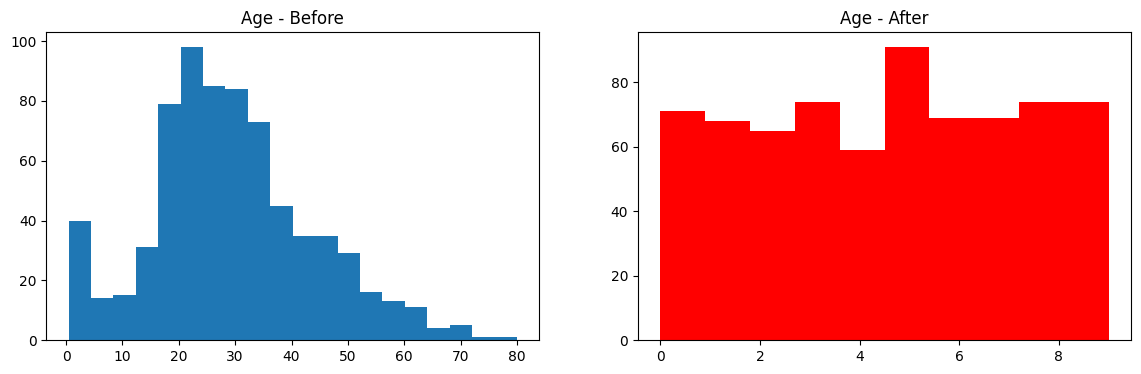

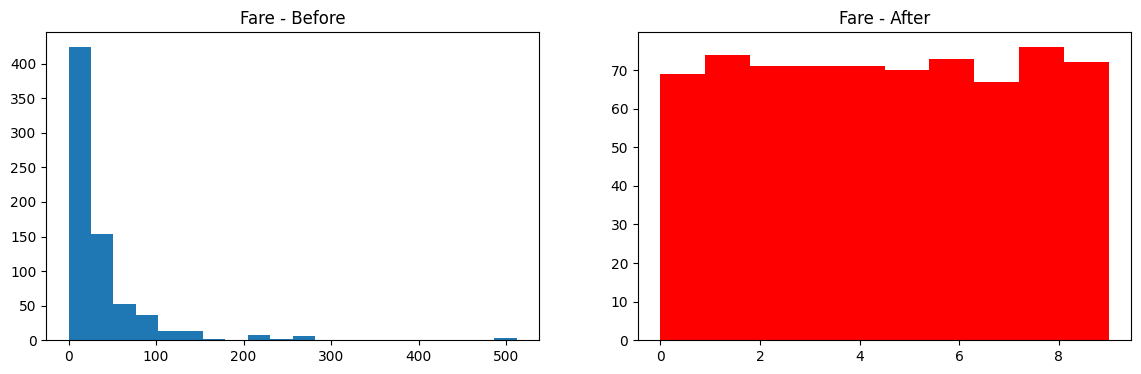

In [51]:
X = df[['Age', 'Fare']].values   # Features
y = df['Survived'].values        # Target

discretize(X, y, bins=10, strategy='quantile')